# Propagation in a standard atmosphere


In [1]:
import os
os.chdir('../../../')
from rwp.environment import *
from rwp.sspade import *
from rwp.vis import *

Preparing environment

In [2]:
environment = Troposphere()
environment.terrain = Terrain(ground_material=WetGround())
environment.z_max = 300
max_range = 150e3

Preparing transmitting antenna

In [3]:
antenna = GaussAntenna(wavelength=0.1,
                       height=30,
                       beam_width=2,
                       eval_angle=0,
                       polarz='H')

Calculating the electromagnetic field

In [4]:
propagator = TroposphericRadioWaveSSPadePropagator(antenna=antenna,
                                                   env=environment,
                                                   max_range_m=max_range)
field = propagator.calculate()

Visualising results

In [5]:
vis = FieldVisualiser(field, env=environment, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)), label='Pade + Transparent BC', x_mult=1E-3)

Amplitude of the field along axis x at the height z = 30 m

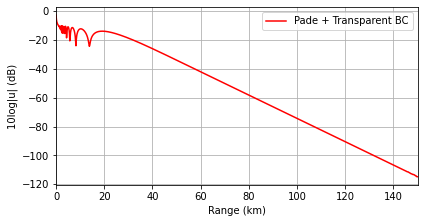

In [6]:
plt = vis.plot_hor(30)
plt.xlabel('Range (km)')
plt.ylabel('10log|u| (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

Two dimensional distribution of the field amplitude

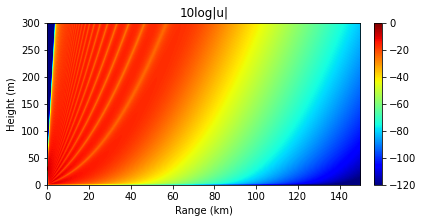

In [7]:
plt = vis.plot2d(min=-120, max=0)
plt.title('10log|u|')
plt.xlabel('Range (km)')
plt.ylabel('Height (m)')
plt.tight_layout()
plt.show()